In [23]:
import argparse
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [24]:
# from model3_cifar import  create_model
from model7 import create_model
from utils_cifar100 import load_data


In [25]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=num_classes)
    return image, label

In [26]:

#load data:
train_data, val_data, test_data, num_classes = load_data()

In [27]:

#preprocess data:
train_data = train_data.map(preprocess).shuffle(10000).batch(128)
val_data = val_data.map(preprocess).batch(128)
test_data = test_data.map(preprocess).batch(128)

In [28]:
model = create_model(100)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Add early stopping
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [29]:
# Train the model with hyperparameters
history = model.fit(train_data, epochs=200, validation_data=val_data)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

Epoch 1/200
313/313 [==============================] - 11s 31ms/step - loss: 4.8675 - accuracy: 0.0334 - val_loss: 4.8210 - val_accuracy: 0.0200
Epoch 2/200
313/313 [==============================] - 9s 30ms/step - loss: 4.3902 - accuracy: 0.0645 - val_loss: 3.9443 - val_accuracy: 0.1241
Epoch 3/200
313/313 [==============================] - 9s 30ms/step - loss: 4.1570 - accuracy: 0.0912 - val_loss: 3.6461 - val_accuracy: 0.1735
Epoch 4/200
313/313 [==============================] - 9s 30ms/step - loss: 3.9963 - accuracy: 0.1105 - val_loss: 3.5331 - val_accuracy: 0.1826
Epoch 5/200
313/313 [==============================] - 9s 30ms/step - loss: 3.8377 - accuracy: 0.1299 - val_loss: 3.4187 - val_accuracy: 0.1988
Epoch 6/200
313/313 [==============================] - 9s 30ms/step - loss: 3.7100 - accuracy: 0.1463 - val_loss: 3.3450 - val_accuracy: 0.2138
Epoch 7/200
313/313 [==============================] - 9s 30ms/step - loss: 3.5901 - accuracy: 0.1634 - val_loss: 3.1867 - val_accuracy

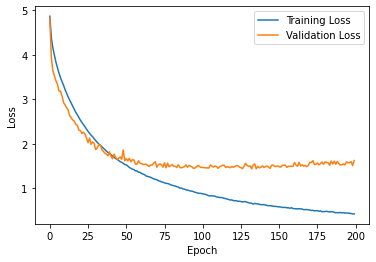

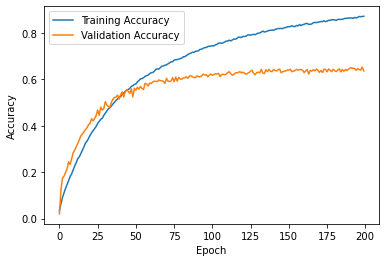

In [30]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()